[View in Colaboratory](https://colab.research.google.com/github/SnehJain/Deep-Neural-Networks-For-Stock-Price-Prediction/blob/master/MRF/MRF_Stock_Prediction_Using_LSTM.ipynb)

In [1]:
#import quandl
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from math import sqrt

In [9]:
df = pd.read_csv("mrf_stock_2018-07-08.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2013-01-01,12927.0,13380.00,12879.85,13350.0,13243.25,20619.0,2695.81
1,2013-01-02,13312.4,13435.00,13256.00,13295.0,13316.20,12217.0,1631.71
2,2013-01-03,13351.0,13365.95,13124.15,13273.0,13279.10,10213.0,1353.29
3,2013-01-04,13240.0,13418.40,13221.30,13365.0,13361.10,7307.0,973.81
4,2013-01-07,13375.0,13439.95,13265.00,13295.0,13288.80,7509.0,1001.57


#Removing unwanted columns 

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.drop(df.columns[[0,4,7,6]], axis=1, inplace=True)
df.head()

,Open,High,Low,Close
0,12927.0,13380.00,12879.85,13243.25
1,13312.4,13435.00,13256.00,13316.20
2,13351.0,13365.95,13124.15,13279.10
3,13240.0,13418.40,13221.30,13361.10
4,13375.0,13439.95,13265.00,13288.80


#scaling the data 

In [11]:
df['High'] = df['High'] / 100000
df['Open'] = df['Open'] / 100000
df['Low'] = df['Low'] / 100000
df['Close'] = df['Close'] / 100000
print(df.head())
print(df.tail())

       Open      High       Low     Close
0  0.129270  0.133800  0.128799  0.132433
1  0.133124  0.134350  0.132560  0.133162
2  0.133510  0.133660  0.131241  0.132791
3  0.132400  0.134184  0.132213  0.133611
4  0.133750  0.134400  0.132650  0.132888
          Open      High       Low     Close
1326  0.747500  0.751527  0.745154  0.747374
1327  0.748500  0.755990  0.743416  0.746049
1328  0.745000  0.750989  0.739781  0.748734
1329  0.748034  0.752769  0.744000  0.745599
1330  0.745550  0.755090  0.739251  0.742062


#converting datapoints into ARRAY

In [14]:
data = df.values

In [15]:
data

array([[0.12927  , 0.1338   , 0.1287985, 0.1324325],
       [0.133124 , 0.13435  , 0.13256  , 0.133162 ],
       [0.13351  , 0.1336595, 0.1312415, 0.132791 ],
       ...,
       [0.745    , 0.7509885, 0.7397805, 0.748734 ],
       [0.748034 , 0.7527695, 0.744    , 0.7455995],
       [0.74555  , 0.75509  , 0.739251 , 0.742062 ]])

#SPLITTING THE DATA INTO TAINING AND TESTING 

In [16]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    
result = np.array(result)

row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


#IMPORTING LIBRARIES FOR LSTM

In [18]:
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D
from keras.layers import LSTM
from keras import losses

#Defining and building the model

In [19]:
from keras import optimizers
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

#RETURING THE SUMMARY OF MODEL 

In [20]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,249 (348.63 KB)

 Trainable params: 89,249 (348.63 KB)

 Non-trainable params: 0 (0.00 B)

None


#Fitting the model

In [34]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,y_train,batch_size=128,epochs=1000,validation_split=0.2,verbose=2)
end = timer()
print(end - start)

Epoch 1/1000
7/7 - 0s - 14ms/step - loss: 5.9291e-04 - mae: 0.0183 - val_loss: 0.0017 - val_mae: 0.0329
Epoch 2/1000
7/7 - 0s - 10ms/step - loss: 6.5727e-04 - mae: 0.0187 - val_loss: 0.0016 - val_mae: 0.0316
Epoch 3/1000
7/7 - 0s - 10ms/step - loss: 6.2298e-04 - mae: 0.0180 - val_loss: 0.0017 - val_mae: 0.0323
Epoch 4/1000
7/7 - 0s - 10ms/step - loss: 6.4280e-04 - mae: 0.0182 - val_loss: 0.0017 - val_mae: 0.0327
Epoch 5/1000
7/7 - 0s - 10ms/step - loss: 5.2180e-04 - mae: 0.0168 - val_loss: 0.0013 - val_mae: 0.0281
Epoch 6/1000
7/7 - 0s - 10ms/step - loss: 6.0890e-04 - mae: 0.0176 - val_loss: 0.0014 - val_mae: 0.0291
Epoch 7/1000
7/7 - 0s - 10ms/step - loss: 5.9542e-04 - mae: 0.0179 - val_loss: 0.0015 - val_mae: 0.0298
Epoch 8/1000
7/7 - 0s - 10ms/step - loss: 5.6847e-04 - mae: 0.0178 - val_loss: 0.0021 - val_mae: 0.0373
Epoch 9/1000
7/7 - 0s - 10ms/step - loss: 6.0544e-04 - mae: 0.0182 - val_loss: 0.0016 - val_mae: 0.0313
Epoch 10/1000
7/7 - 0s - 10ms/step - loss: 6.3534e-04 - mae: 0.0

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

###Visualisations

#Plotting the losses

C:\Users\vsharma6\AppData\Local\Temp\ipykernel_6660\1975865637.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
C:\Users\vsharma6\AppData\Local\Temp\ipykernel_6660\1975865637.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')


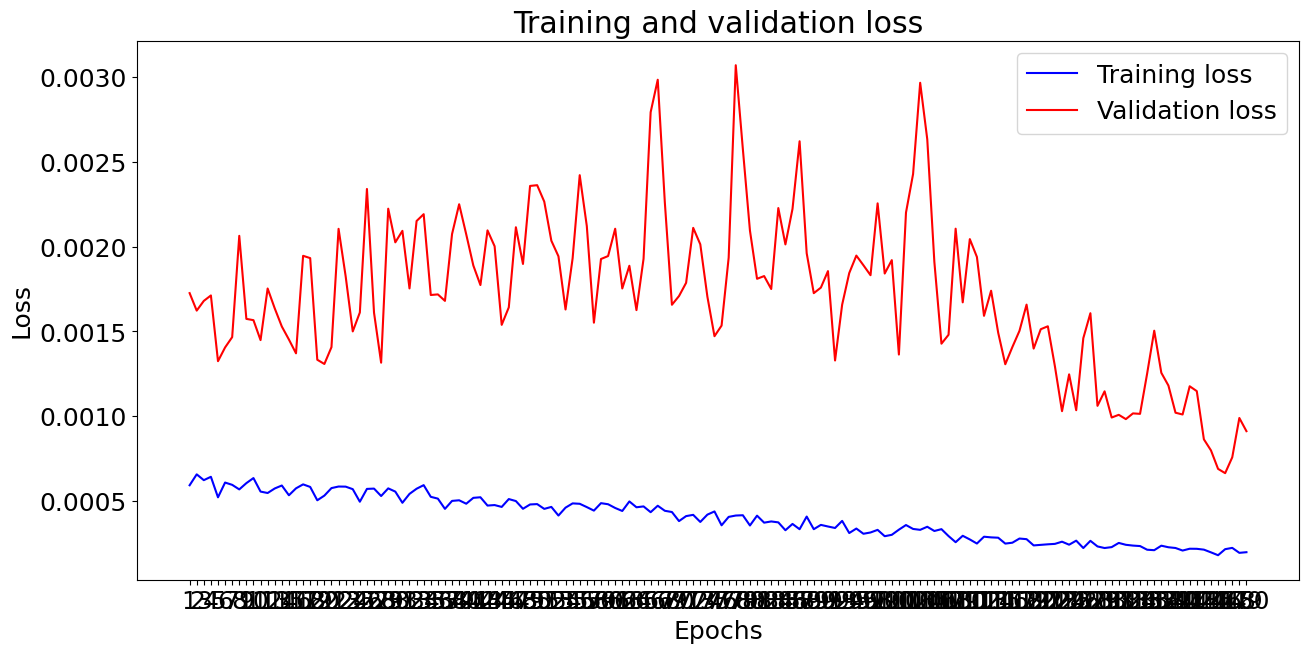

In [36]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationlossconv1dlstm.png', dpi=300)
plt.show()

#Plot for errors

C:\Users\vsharma6\AppData\Local\Temp\ipykernel_6660\1360073595.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
C:\Users\vsharma6\AppData\Local\Temp\ipykernel_6660\1360073595.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vmae, 'b',color='red', label='Validation error')


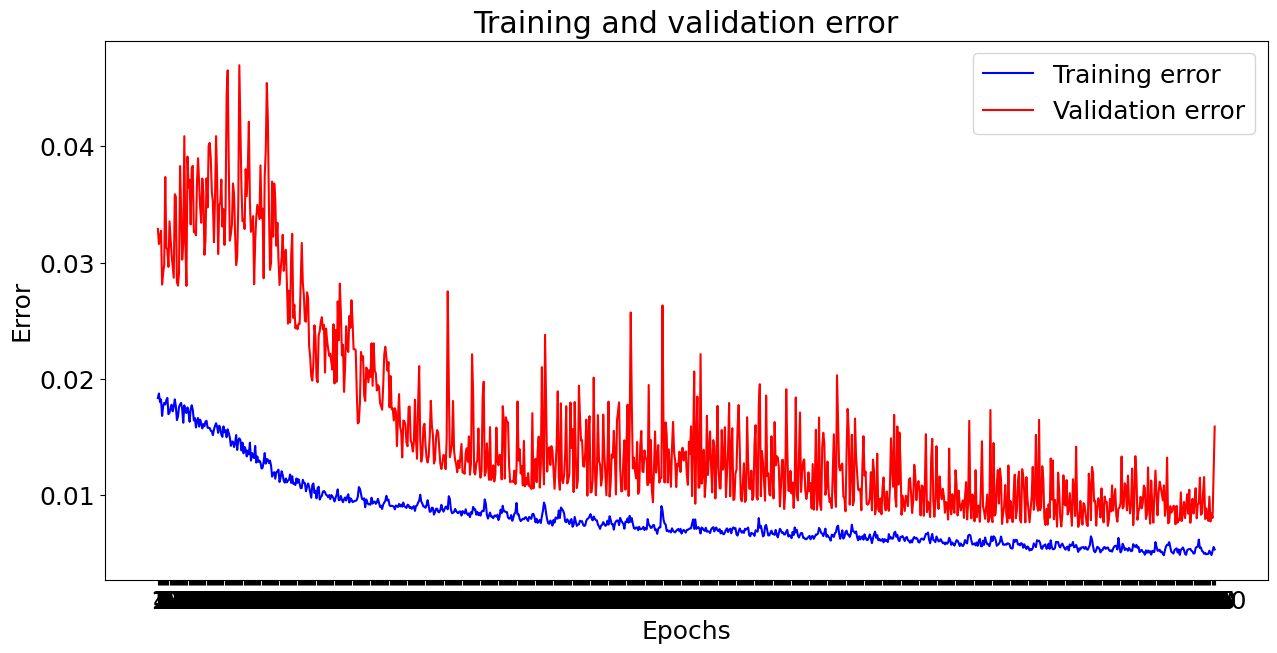

In [38]:
mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationerrorconv1dlstm.png', dpi=300)
plt.show()

In [39]:
model.metrics_names

['loss', 'compile_metrics']

In [40]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

##predicting the values of y_test

In [41]:
#predicting values for y_test
p = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


#Plot for (y_test v/s predictions)

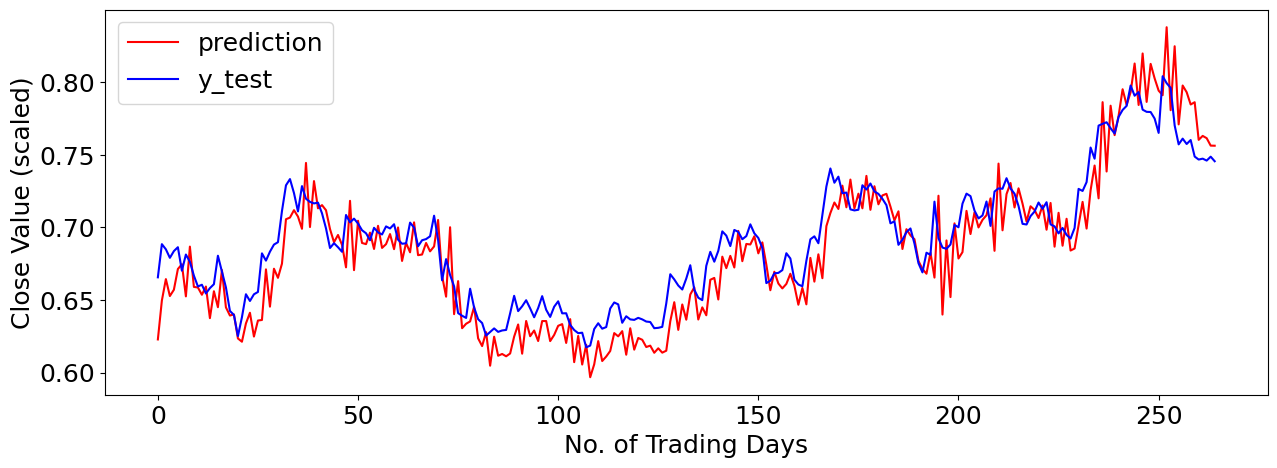

In [42]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.show()

predictions for training data 

In [43]:
p1= model.predict(x_train)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


#Plot for training , validation and y_train

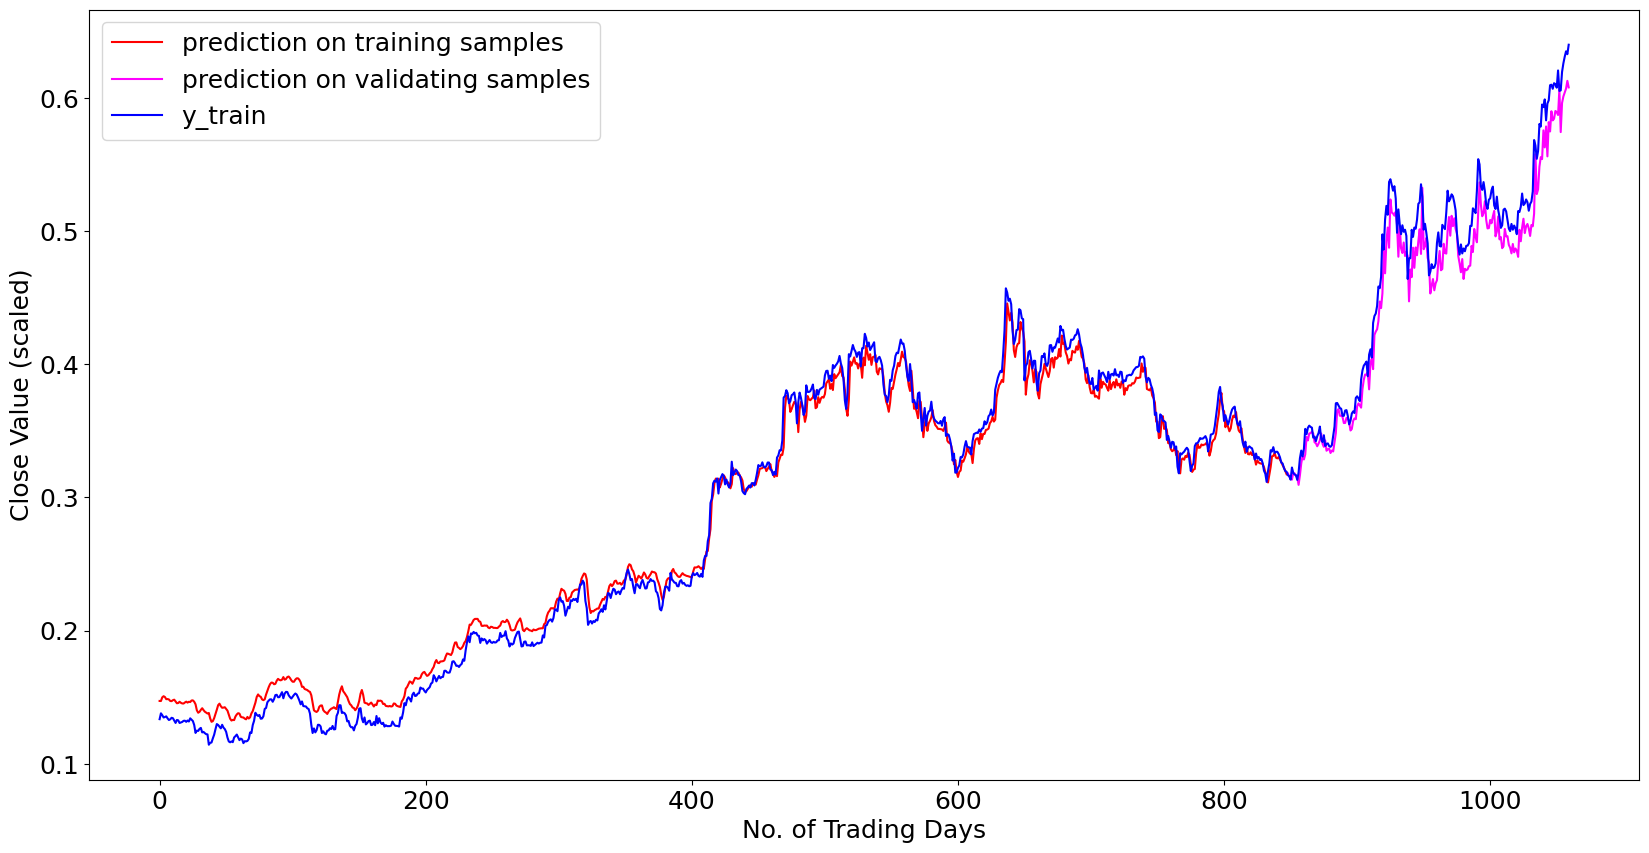

In [44]:
plt.plot(p1[:848],color='red', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)

plt.show()

#Reshaping the data points

In [45]:
y = y_test * 100000
y_pred = p.reshape(265)
y_pred = y_pred * 100000

In [46]:
from sklearn.metrics import mean_absolute_error

#Evaluating the model using evaluation metrices

In [47]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.012912849 		 0.010503914 		 0.019501767 		 0.015771471


In [48]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 1577.147211816 			 2.277092304


#Combined plot for all predicted values and the actual values of stock('close') 

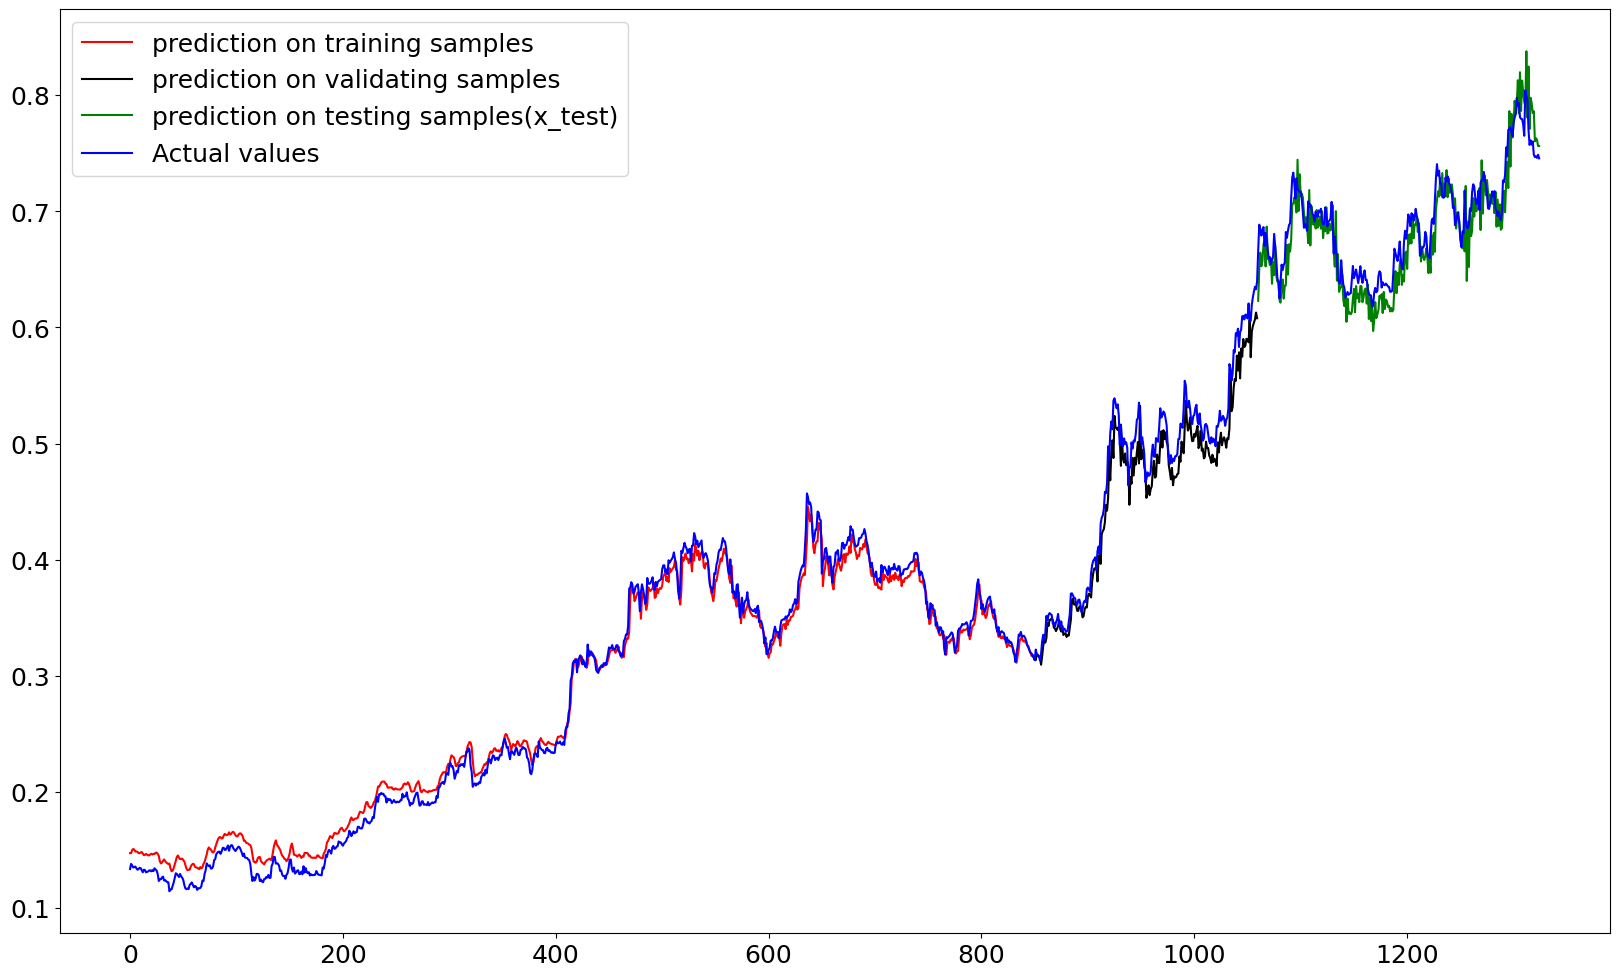

In [50]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)

plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'black',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'green',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Actual values')
plt.legend(loc='upper left') 
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()